_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 48, 48, 64)        1792      
_________________________________________________________________
act1_1 (Activation)          (None, 48, 48, 64)        0         
_________________________________________________________________
bn1_1 (BatchNormalization)   (None, 48, 48, 64)        256       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 48, 48, 64)        36928     
_________________________________________________________________
act1_2 (Activation)          (None, 48, 48, 64)        0         
_________________________________________________________________
bn1_2 (BatchNormalization)   (None, 48, 48, 64)        256       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 24, 24, 64)        0         
__________

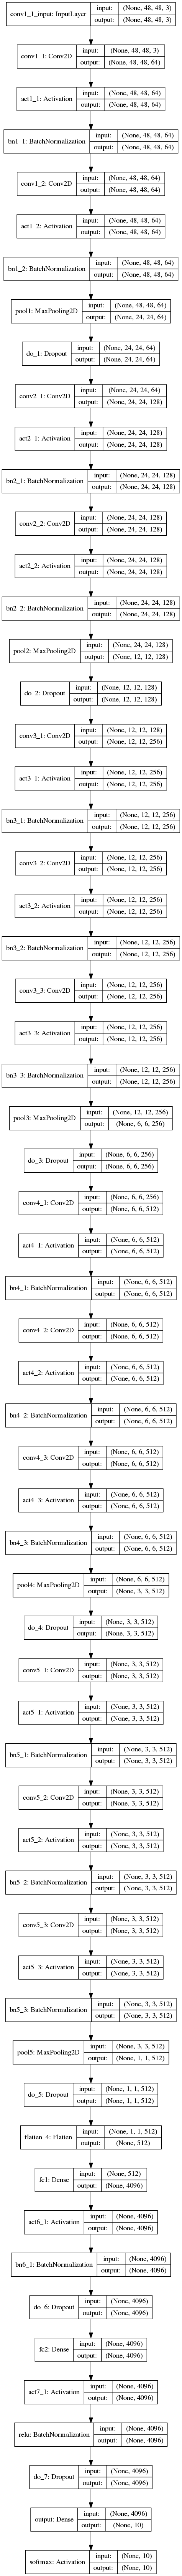

In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

from keras.utils import plot_model
from IPython.display import Image

width    = 48
height   = 48
depth    = 3
classes  = 10

inputShape = (height, width, depth)

model = Sequential()

# block #1 (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (3, 3), padding='same', input_shape=inputShape, name='conv1_1'))
model.add(Activation('relu', name='act1_1'))
model.add(BatchNormalization(axis=-1, name='bn1_1'))

model.add(Conv2D(64, (3, 3), padding='same', name='conv1_2'))
model.add(Activation('relu', name='act1_2'))
model.add(BatchNormalization(axis=-1, name='bn1_2'))
model.add(MaxPooling2D((2, 2), name='pool1'))
model.add(Dropout(0.25, name='do_1'))


# block #2 (CONV => RELU) * 2 => POOL
model.add(Conv2D(128, (3, 3), padding='same', name='conv2_1'))
model.add(Activation('relu', name='act2_1'))
model.add(BatchNormalization(axis=-1, name='bn2_1'))

model.add(Conv2D(128, (3, 3), padding='same', name='conv2_2'))
model.add(Activation('relu', name='act2_2'))
model.add(BatchNormalization(axis=-1, name='bn2_2'))
model.add(MaxPooling2D((2, 2), name='pool2'))
model.add(Dropout(0.25, name='do_2'))


# block #3 (CONV => RELU) * 3 => POOL
model.add(Conv2D(256, (3, 3), padding='same', name='conv3_1'))
model.add(Activation('relu', name='act3_1'))
model.add(BatchNormalization(axis=-1, name='bn3_1'))

model.add(Conv2D(256, (3, 3), padding='same', name='conv3_2'))
model.add(Activation('relu', name='act3_2'))
model.add(BatchNormalization(axis=-1, name='bn3_2'))
model.add(Conv2D(256, (3, 3), padding='same', name='conv3_3'))
model.add(Activation('relu', name='act3_3'))
model.add(BatchNormalization(axis=-1, name='bn3_3'))
model.add(MaxPooling2D((2, 2), name='pool3'))
model.add(Dropout(0.25, name='do_3'))


# block #4 (CONV => RELU) * 3 => POOL
model.add(Conv2D(512, (3, 3), padding='same', name='conv4_1'))
model.add(Activation('relu', name='act4_1'))
model.add(BatchNormalization(axis=-1, name='bn4_1'))

model.add(Conv2D(512, (3, 3), padding='same', name='conv4_2'))
model.add(Activation('relu', name='act4_2'))
model.add(BatchNormalization(axis=-1, name='bn4_2'))

model.add(Conv2D(512, (3, 3), padding='same', name='conv4_3'))
model.add(Activation('relu', name='act4_3'))
model.add(BatchNormalization(axis=-1, name='bn4_3'))
model.add(MaxPooling2D((2, 2), name='pool4'))
model.add(Dropout(0.25, name='do_4'))


# block #5 (CONV => RELU) * 3 => POOL
model.add(Conv2D(512, (3, 3), padding='same', name='conv5_1'))
model.add(Activation('relu', name='act5_1'))
model.add(BatchNormalization(axis=-1, name='bn5_1'))

model.add(Conv2D(512, (3, 3), padding='same', name='conv5_2'))
model.add(Activation('relu', name='act5_2'))
model.add(BatchNormalization(axis=-1, name='bn5_2'))

model.add(Conv2D(512, (3, 3), padding='same', name='conv5_3'))
model.add(Activation('relu', name='act5_3'))
model.add(BatchNormalization(axis=-1, name='bn5_3'))
model.add(MaxPooling2D((2, 2), name='pool5'))
model.add(Dropout(0.25, name='do_5'))


# block #6 FC => RELU 
model.add(Flatten())
model.add(Dense(4096, name='fc1'))
model.add(Activation('relu', name='act6_1'))
model.add(BatchNormalization(axis=-1, name='bn6_1'))
model.add(Dropout(0.5, name='do_6'))


# block #7 FC => RELU
model.add(Dense(4096, name='fc2'))
model.add(Activation('relu', name='act7_1'))
model.add(BatchNormalization(axis=-1, name='relu'))
model.add(Dropout(0.5, name='do_7'))


# softmax output
model.add(Dense(classes, name='output'))
model.add(Activation('softmax', name='softmax'))


model.summary()
plot_model(model, to_file='VGG16.png',show_shapes=True)
Image('VGG16.png')